In [49]:
#Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
#Filtering/Handling Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the dataset
df = pd.read_csv("D:\Datasets\ITC Historical Data (1).csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,24-02-2025,401.90,400.00,403.40,398.75,7.04M,0.25%
1,21-02-2025,400.90,402.05,403.25,399.20,8.24M,-0.29%
2,20-02-2025,402.05,399.95,403.90,396.20,15.36M,-1.07%
3,19-02-2025,406.40,404.80,408.80,404.50,7.08M,0.28%
4,18-02-2025,405.25,408.00,410.85,404.00,13.00M,-0.82%


In [ ]:
#Exploring the bottom 5 values
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
4995,07-01-2005,28.73,27.98,28.88,27.98,9.87M,1.84%
4996,06-01-2005,28.21,28.60,28.60,27.87,10.05M,-1.57%
4997,05-01-2005,28.66,29.28,29.28,28.31,14.01M,-1.34%
4998,04-01-2005,29.05,28.93,29.26,28.73,6.98M,0.10%
4999,03-01-2005,29.02,29.15,29.37,28.88,6.92M,0.17%


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   Price     5000 non-null   float64
 2   Open      5000 non-null   float64
 3   High      5000 non-null   float64
 4   Low       5000 non-null   float64
 5   Vol.      5000 non-null   object 
 6   Change %  5000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.6+ KB


In [ ]:
#Setting date as Index
df.index = pd.to_datetime(df['Date'])

In [55]:
df['Volume'] = 0

for i in range(len(df['Vol.'])):
    if df['Vol.'].iloc[i].endswith('M'):
        df['Volume'].iloc[i] = float(df['Vol.'].iloc[i][:-1])* 1000000
    elif df['Vol.'].iloc[i].endswith('K'):
        df['Volume'].iloc[i] = float(df['Vol.'].iloc[i][:-1])* 1000   

In [56]:
df['Close'] = df['Price']
df.drop(columns=['Vol.',"Change %",'Price','Date'], inplace= True)
df.head()

,Open,High,Low,Volume,Close
Date,,,,,
2025-02-24,400.00,403.40,398.75,7040000.0,401.90
2025-02-21,402.05,403.25,399.20,8240000.0,400.90
2025-02-20,399.95,403.90,396.20,15360000.0,402.05
2025-02-19,404.80,408.80,404.50,7080000.0,406.40
2025-02-18,408.00,410.85,404.00,13000000.0,405.25


In [57]:
df['Change in %'] = df['Close'].pct_change() * 100
df.head()

,Open,High,Low,Volume,Close,Change in %
Date,,,,,,
2025-02-24,400.00,403.40,398.75,7040000.0,401.90,NaN
2025-02-21,402.05,403.25,399.20,8240000.0,400.90,-0.248818
2025-02-20,399.95,403.90,396.20,15360000.0,402.05,0.286855
2025-02-19,404.80,408.80,404.50,7080000.0,406.40,1.081955
2025-02-18,408.00,410.85,404.00,13000000.0,405.25,-0.282972


In [58]:
df.isna().sum()

Open           0
High           0
Low            0
Volume         0
Close          0
Change in %    1
dtype: int64

In [60]:
df.duplicated().sum()

np.int64(0)

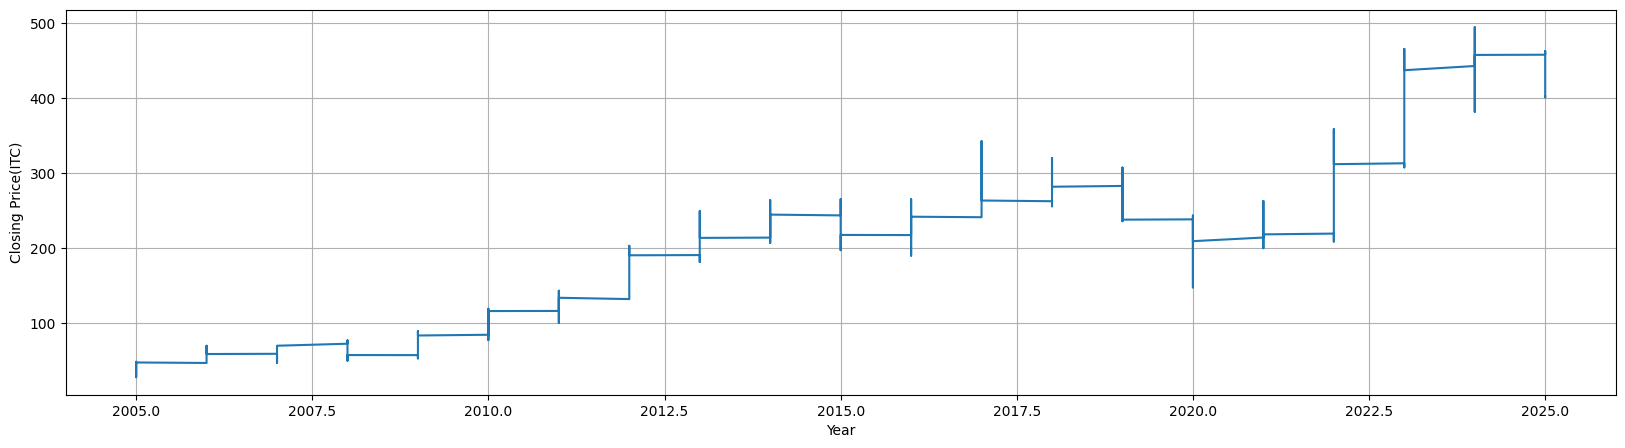

In [ ]:
#Plotting the Closing Price
plt.figure(figsize=(20,5))
plt.plot(df.index.year, df['Close'])
plt.xlabel('Year')
plt.ylabel('Closing Price(ITC)')
plt.grid(True)
plt.show()

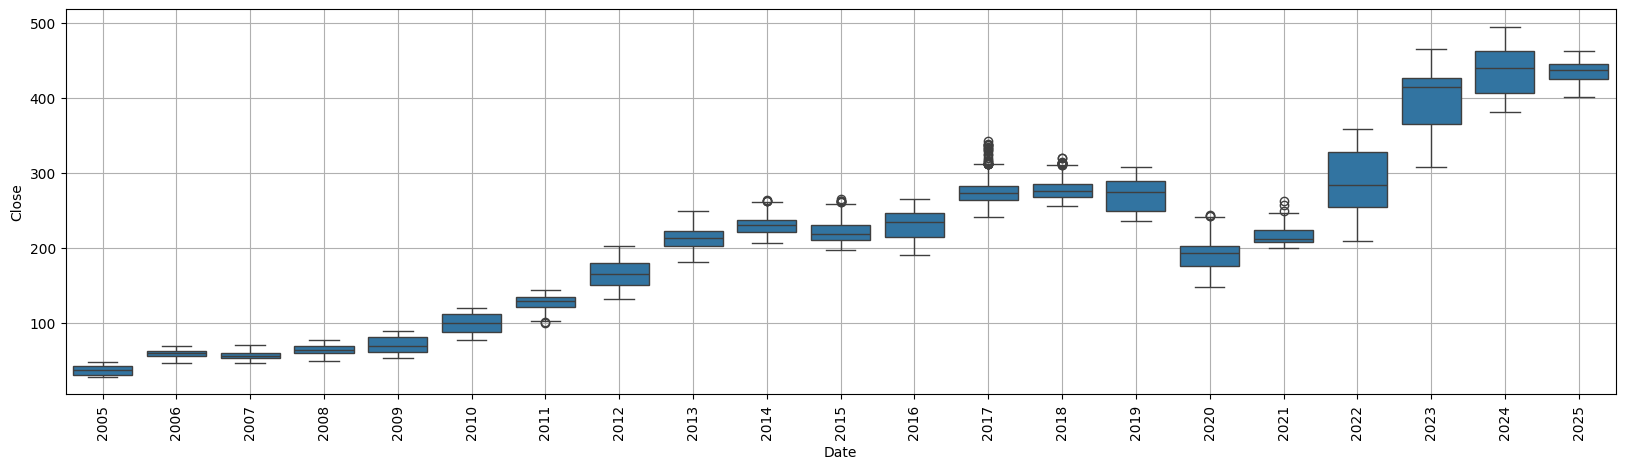

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df.index.year, y = df['Close'])
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Price is showing an upward Trend. There are chances of non- stationarity 

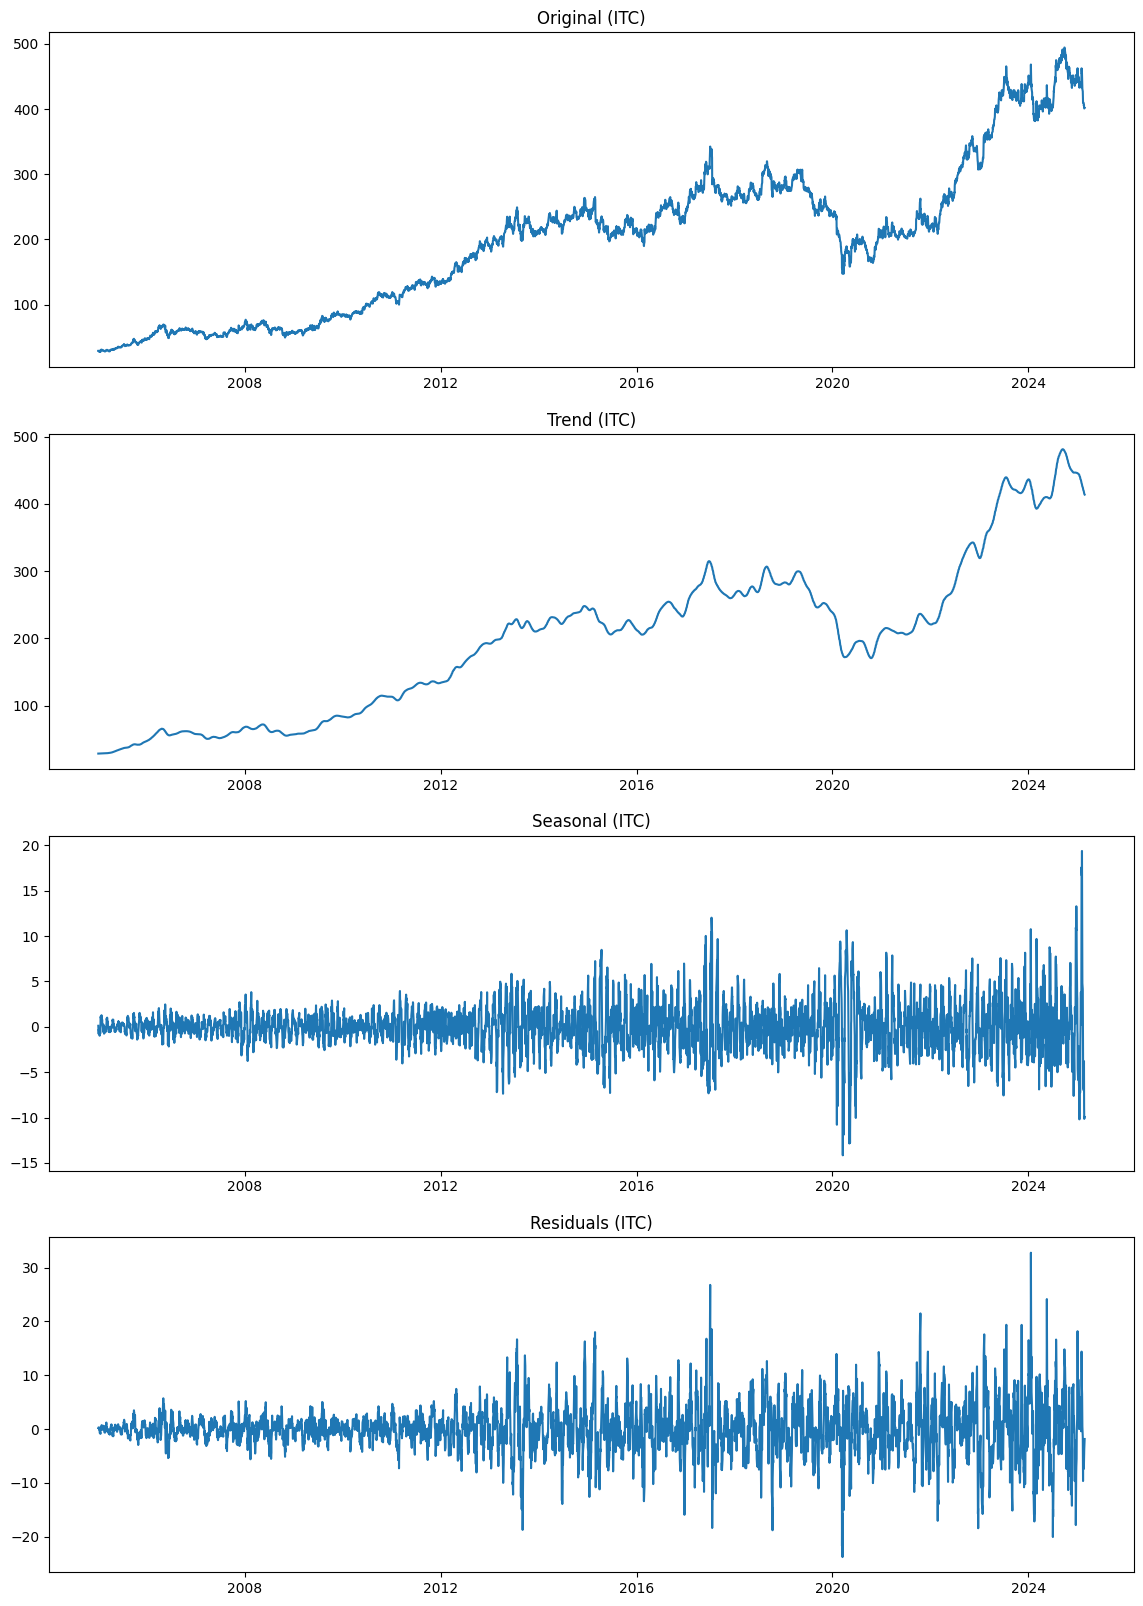

In [63]:
#importing Seasonal and Trend decomposition using Loess Model from the StasModel Library
from statsmodels.tsa.seasonal import STL
stl = STL(df['Close'], period = 30)
result = stl.fit()#fitting the model

#plotting the original price data
plt.figure(figsize= (14,20))
plt.subplot(4,1,1)
plt.plot(result.observed,)
plt.title('Original (ITC)')

#plotting the trend data obtain using STL model
plt.subplot(4,1,2)
plt.plot(result.trend)
plt.title('Trend (ITC)')

#plotting the seasonal data obtain using STL model
plt.subplot(4,1,3)
plt.plot(result.seasonal)
plt.title('Seasonal (ITC)')

#plotting the residuals data obtain using STL model
plt.subplot(4,1,4)
plt.plot(result.resid)
plt.title('Residuals (ITC)');

Price is showing an upward trend. There are cyclic patterns in data.
There is high seasonality in data.
There are residual values.

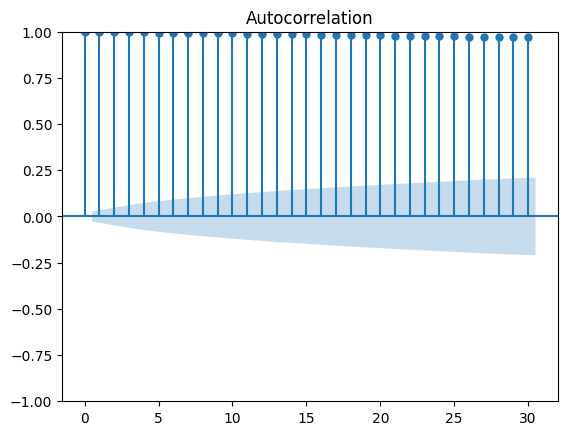

In [ ]:
#Plotting the Autocorrelation Graph
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Close'], lags = 30);

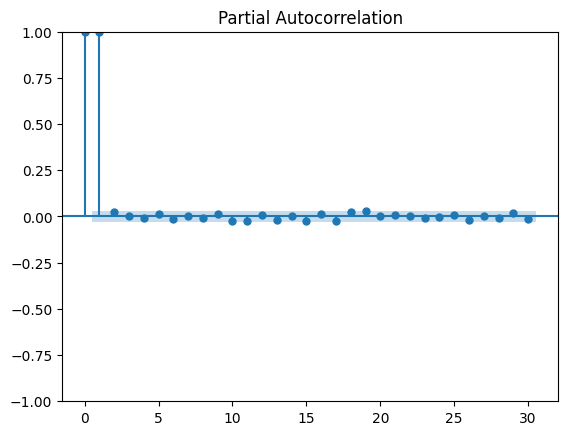

In [ ]:
#Plotting the Partial-Autocorrelation Graph
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['Close'], lags = 30);

**ADF Test Hypothesis**

H₀: The series is non-stationary (has a trend, mean or variance changes over time)

H₁: The series is stationary (mean and variance are constant over time)


In [66]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'])
result

(np.float64(-1.56476569433364),
 np.float64(0.5012646031023215),
 25,
 4974,
 {'1%': np.float64(-3.4316653755446955),
  '5%': np.float64(-2.862121253084995),
  '10%': np.float64(-2.5670794018368777)},
 np.float64(26298.733266525785))

Non-Stationary at Lag of 25 


In [ ]:
#Differencing from order 1 to 10.
for i in range(1,10):
    Close_dif_1 = list(df['Close'].diff(periods = i))

    from statsmodels.tsa.stattools import adfuller
    result = adfuller(Close_dif_1[i:])
    print(f'Result at Difference of Order of {i}')
    print(result[1])

Result at Difference of Order of 1
6.719935832204719e-27
Result at Difference of Order of 2
2.816359108138359e-24
Result at Difference of Order of 3
9.376576761301127e-25
Result at Difference of Order of 4
2.375262080784802e-22
Result at Difference of Order of 5
2.0372988178054952e-22
Result at Difference of Order of 6
7.014455508735807e-22
Result at Difference of Order of 7
1.0388922232120168e-22
Result at Difference of Order of 8
6.793312803868491e-20
Result at Difference of Order of 9
1.0939658764061564e-21


Closing Price is still non-stationary for differencing from order 1 to 10.

In [ ]:
#Logarithm transformation.
Close_log = np.log(df['Close'])

from statsmodels.tsa.stattools import adfuller
result = adfuller(Close_log)
result

(np.float64(0.8170236529014366),
 np.float64(0.9919060509175031),
 22,
 4977,
 {'1%': np.float64(-3.4316645822626564),
  '5%': np.float64(-2.8621209026179866),
  '10%': np.float64(-2.567079215269484)},
 np.float64(-26115.06165923633))

Closing Price is still non-stationary after logarithm transformation.

In [94]:
#Square Rooting
Close_log = np.sqrt(df['Close'])

from statsmodels.tsa.stattools import adfuller
result = adfuller(Close_log)
result

(np.float64(-0.6028064629029691),
 np.float64(0.8703466193986003),
 21,
 4977,
 {'1%': np.float64(-3.4316645822626564),
  '5%': np.float64(-2.8621209026179866),
  '10%': np.float64(-2.567079215269484)},
 np.float64(-7686.168485574568))

Closing Price is still non-stationary after square rooting.

In [ ]:
#Cube Rooting
Close_log = np.cbrt(df['Close'])

from statsmodels.tsa.stattools import adfuller
result = adfuller(Close_log)
result

(np.float64(-0.18229764100089726),
 np.float64(0.9405990588552643),
 21,
 4978,
 {'1%': np.float64(-3.431664318047896),
  '5%': np.float64(-2.862120785889549),
  '10%': np.float64(-2.5670791531303423)},
 np.float64(-20400.378066519377))

Closing Price is still non-stationary after cube rooting.

Closing Price cannot be converted into Stationary Data so we will move forward with Log_Return

In [71]:
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df.dropna(inplace=True)


In [72]:
df.head()

,Open,High,Low,Volume,Close,Change in %,Log_Returns
Date,,,,,,,
2025-02-21,402.05,403.25,399.20,8240000.0,400.90,-0.248818,-0.002491
2025-02-20,399.95,403.90,396.20,15360000.0,402.05,0.286855,0.002864
2025-02-19,404.80,408.80,404.50,7080000.0,406.40,1.081955,0.010761
2025-02-18,408.00,410.85,404.00,13000000.0,405.25,-0.282972,-0.002834
2025-02-17,409.80,411.40,406.75,11980000.0,408.60,0.826650,0.008233


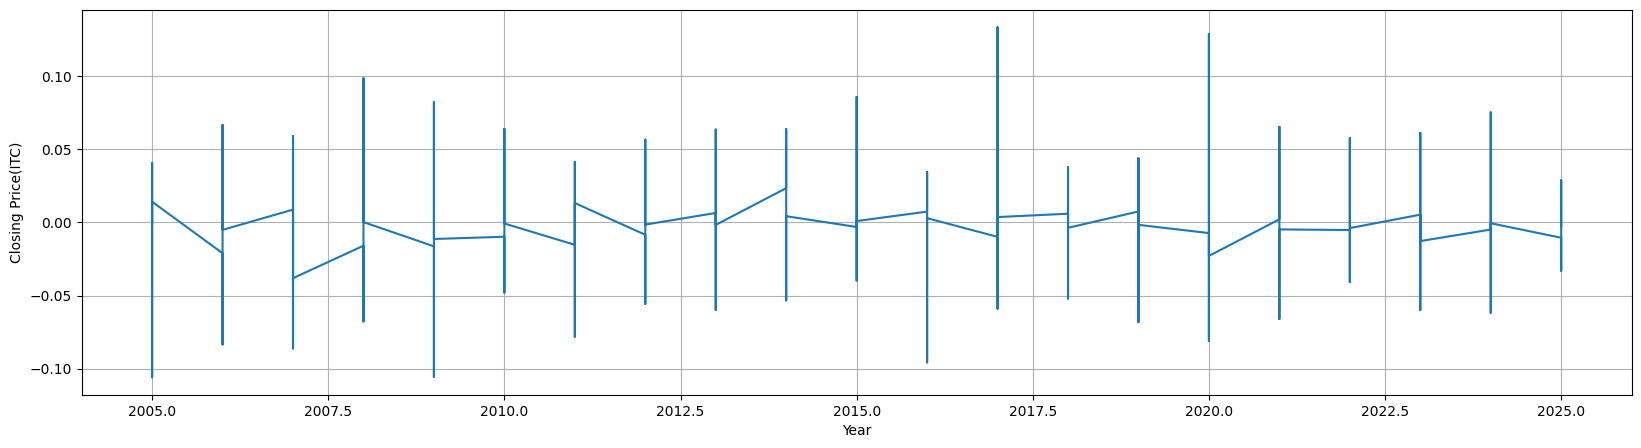

In [73]:
plt.figure(figsize=(20,5))
plt.plot(df.index.year, df['Log_Returns'])
plt.xlabel('Year')
plt.ylabel('Closing Price(ITC)')
plt.grid(True)
plt.show()

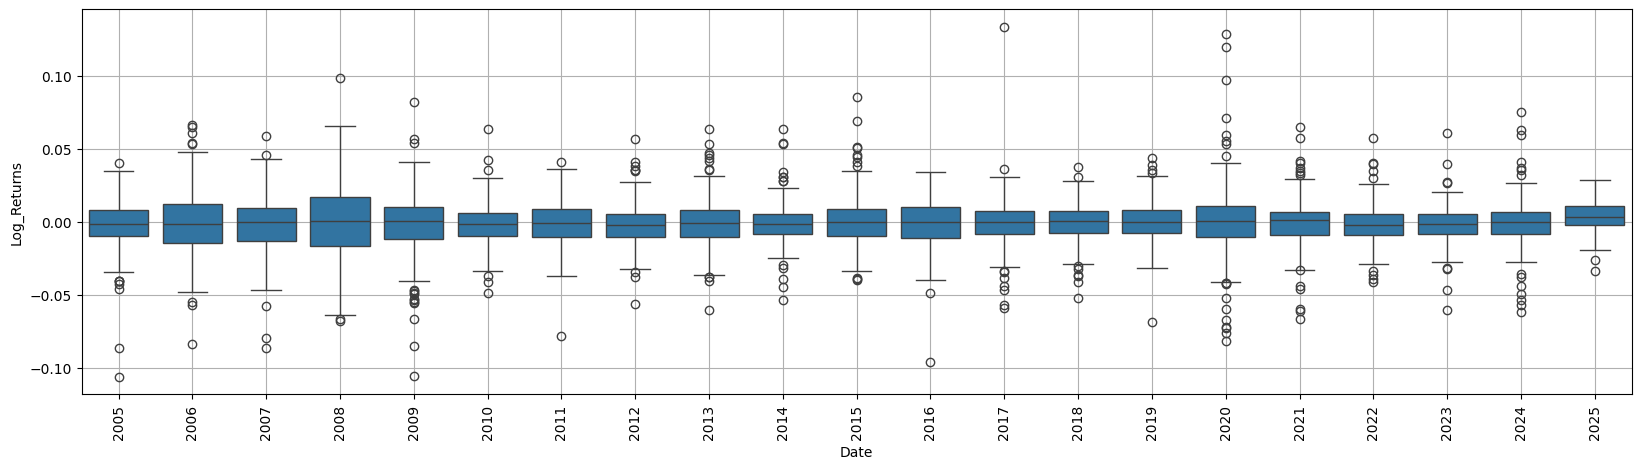

In [74]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df.index.year, y = df['Log_Returns'])
plt.xticks(rotation = 90)
plt.grid()
plt.show()

There is no trend in data. Possiblity for Stationarity in data.

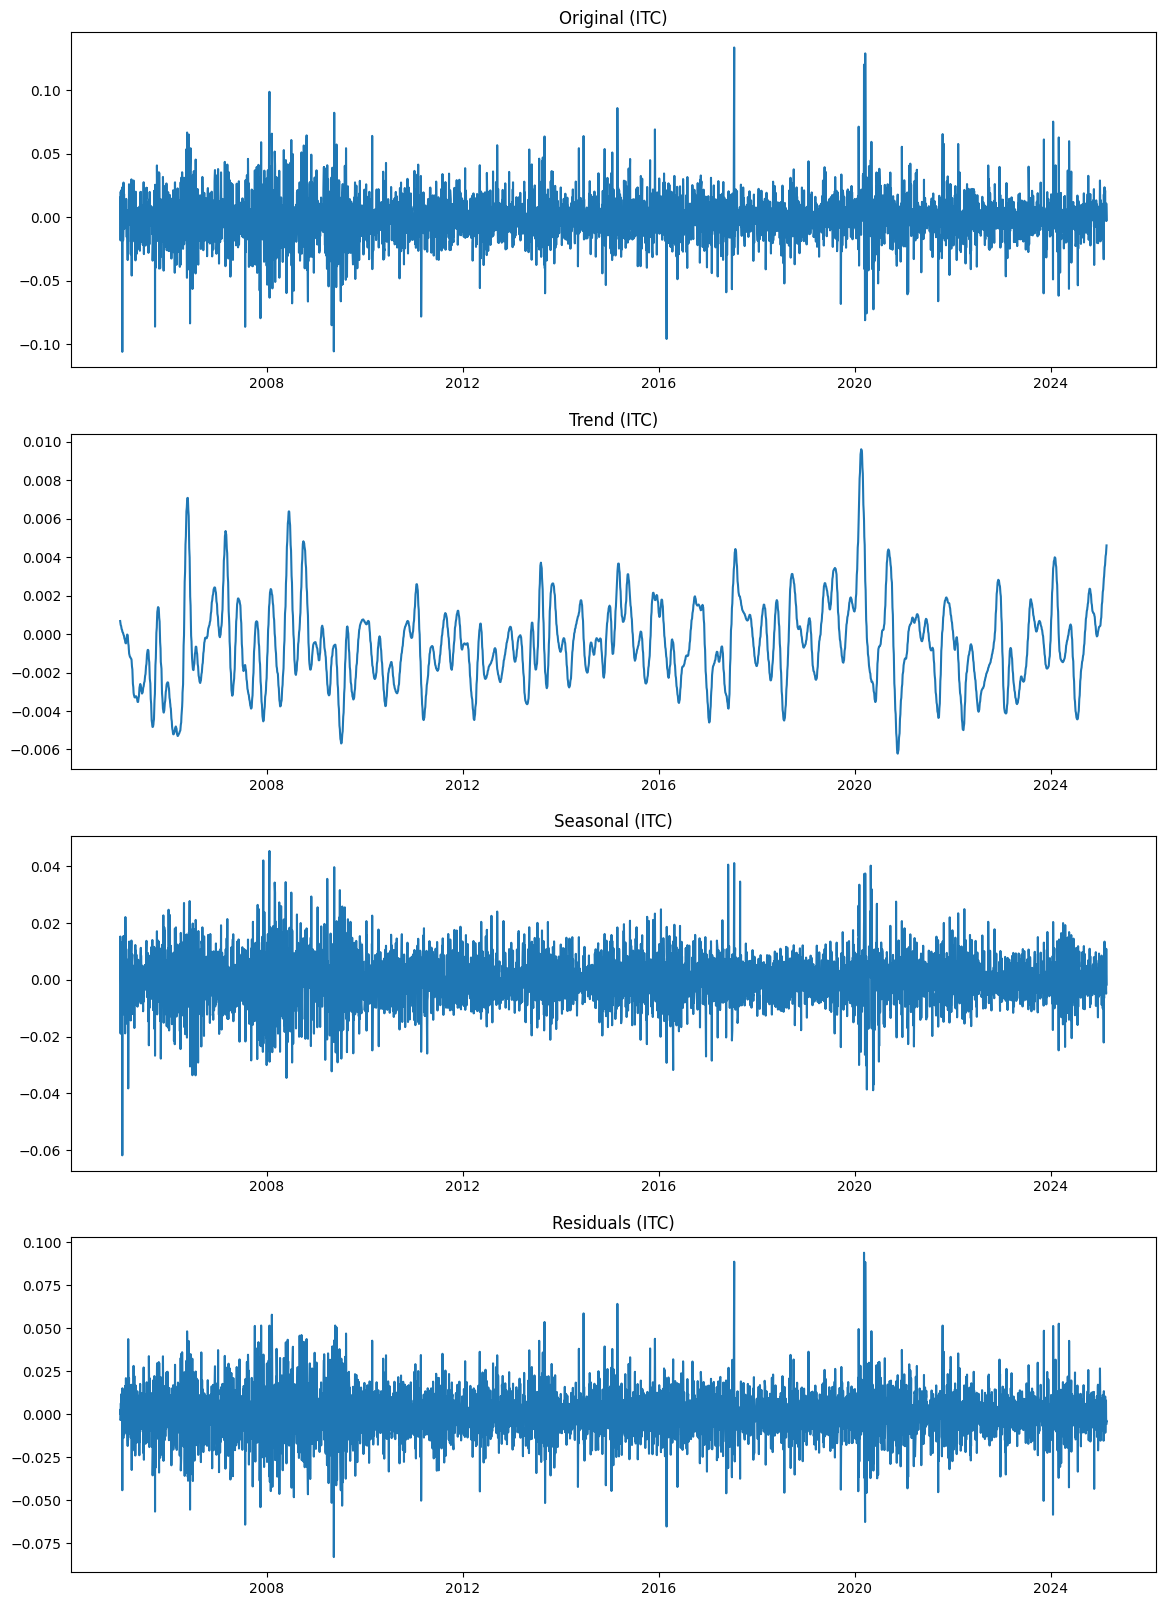

In [90]:
#importing Seasonal and Trend decomposition using Loess Model from the StasModel Library
from statsmodels.tsa.seasonal import STL
stl = STL(df['Log_Returns'], period = 30)
result = stl.fit()#fitting the model

#plotting the original price data
plt.figure(figsize= (14,20))
plt.subplot(4,1,1)
plt.plot(result.observed,)
plt.title('Original (ITC)')

#plotting the trend data obtain using STL model
plt.subplot(4,1,2)
plt.plot(result.trend)
plt.title('Trend (ITC)')

#plotting the seasonal data obtain using STL model
plt.subplot(4,1,3)
plt.plot(result.seasonal)
plt.title('Seasonal (ITC)')

#plotting the residuals data obtain using STL model
plt.subplot(4,1,4)
plt.plot(result.resid)
plt.title('Residuals (ITC)');

There is no Trend in data. There is seasonality and residuals.

In [92]:
corr = df['Close'].corr(df['Log_Returns'])
corr

np.float64(0.02757888501582968)

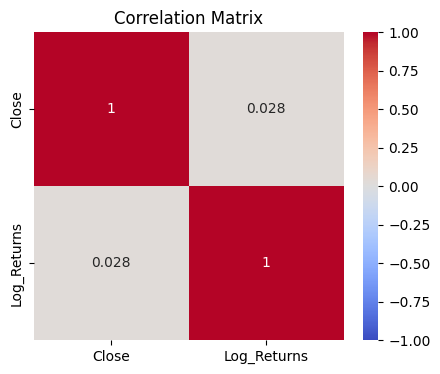

In [76]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['Close','Log_Returns']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

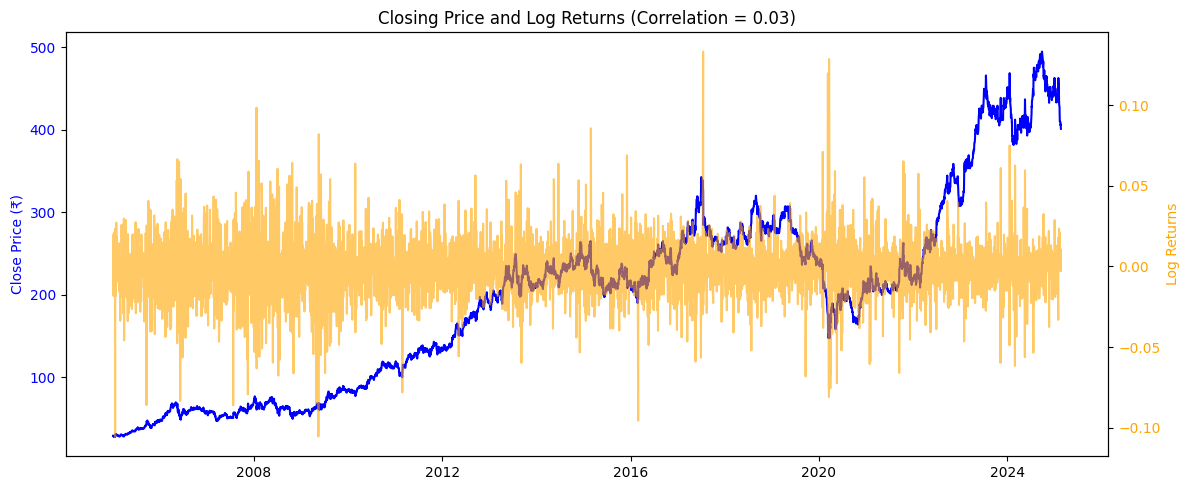

In [77]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(df['Close'], color='blue', label='Close Price')
ax1.set_ylabel('Close Price (₹)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df['Log_Returns'], color='orange', alpha=0.6, label='Log Returns')
ax2.set_ylabel('Log Returns', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Closing Price and Log Returns (Correlation = {df["Close"].corr(df["Log_Returns"]):.2f})')
fig.tight_layout()
plt.show()


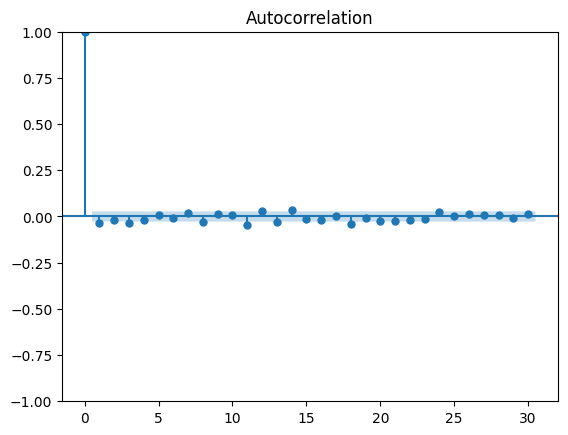

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Log_Returns'], lags=30);

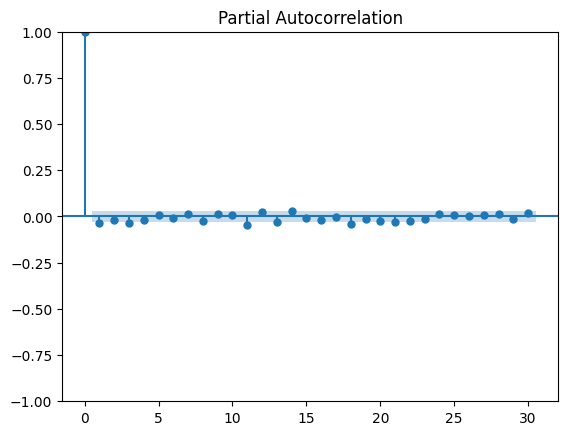

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df['Log_Returns'], lags=30);

In [ ]:
#Checking Log_Return for Stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Log_Returns'])
print("p-value:", result[1])


p-value: 3.832552820899816e-30


Return Is Stionary

In [ ]:
#Fitting the SARIMA Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Log_Returns'][:-50], order=(1,0,1))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:            Log_Returns   No. Observations:                 4949
Model:                 ARIMA(1, 0, 1)   Log Likelihood               13016.749
Date:                Thu, 23 Oct 2025   AIC                         -26025.498
Time:                        12:09:54   BIC                         -25999.471
Sample:                             0   HQIC                        -26016.371
                               - 4949                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -3.165      0.002      -0.001      -0.000
ar.L1          0.8904      0.026     33.958      0.000       0.839       0.942
ma.L1         -0.9262      0.022    -41.727      0.0

The ARIMA(1,0,1) model was fitted on daily log returns, with 4,949 observations. The model includes one autoregressive term (AR=0.8904) and one moving average term (MA=-0.9262), along with a small constant term (const=-0.0005).

- **Mean Equation:** The small negative constant indicates a slight downward drift in daily returns, which is statistically significant (p = 0.002).  
- **AR Term (0.8904):** Shows strong positive autocorrelation — today's return is highly influenced by yesterday's return.  
- **MA Term (-0.9262):** Indicates negative feedback from previous shocks, meaning past unexpected changes are partially corrected the following day.  
- **Sigma² (0.0003):** Residual variance, indicating the level of unexplained volatility.

**Diagnostic Tests:**  
- **Ljung-Box Q (p=0.99):** Residuals show no significant autocorrelation → mean structure is well captured.  
- **Jarque-Bera (p=0.00):** Residuals are not normally distributed, showing heavy tails typical of financial returns.  
- **Heteroskedasticity H (p=0.00):** Variance is not constant → volatility changes over time.

**In Short:**  
The model effectively captures the mean dynamics of daily log returns, showing strong dependence on past returns and shock correction. However, time-varying volatility and heavy-tailed residuals suggest that additional modeling (e.g., GARCH) is needed to capture risk and volatility patterns in the data.

In [ ]:
#Evaluating the SARIMA Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

forecast = result.get_forecast(steps=len(test))
predicted = forecast.predicted_mean

mae = mean_absolute_error(test, predicted)
mse = mean_squared_error(test, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(test, predicted)

print("SARIMA Forecast Accuracy Metrics:")
print(f"MAE  : {mae:.6f}")
print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")
print(f"R²   : {r2:.4f}");

SARIMA Forecast Accuracy Metrics:
MAE  : 0.016286
MSE  : 0.000481
RMSE : 0.021939
R²   : -0.0000


- MAE, MSE, and RMSE values indicate the model’s predictions are generally close to actual returns.
- The R² near zero is expected for financial returns due to high market randomness and does not imply model failure.
- Overall, the model effectively captures return dynamics despite inherent unpredictability.

In [ ]:
#Fitting GARCH Model
from arch import arch_model
residuals = result.resid
garch_model = arch_model(residuals, vol='GARCH', p=1, q=1)
garch_result = garch_model.fit(update_freq=5)
print(garch_result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: -13338.930241113372
            Iterations: 2
            Function evaluations: 29
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                13338.9
Distribution:                  Normal   AIC:                          -26669.9
Method:            Maximum Likelihood   BIC:                          -26643.8
                                        No. Observations:                 4949
Date:                Thu, Oct 23 2025   Df Residuals:                     4948
Time:                        12:09:54   Df Model:                            1
                                  Mean Model                                  
 

The Constant Mean–GARCH(1,1) model was successfully estimated, indicating that the volatility dynamics of daily log returns are well captured. The mean parameter (μ = -0.0001) is statistically insignificant (p = 0.647), suggesting that average daily returns are close to zero — a common property of financial return series that exhibit no consistent upward or downward drift.

The volatility parameters are highly significant (p < 0.001). The constant term (ω = 3.04e-05) represents the long-run baseline level of volatility, while the GARCH coefficient (β₁ = 0.80) indicates strong persistence in volatility. This implies that periods of high volatility are likely to be followed by high volatility, a phenomenon known as **volatility clustering**.

Overall, the model demonstrates that while returns themselves are random, the **risk (volatility)** varies over time and is strongly influenced by past volatility levels. With excellent fit statistics (AIC = -26923.8, BIC = -26897.8), the model is suitable for **volatility and financial risk forecasting** applications.

In [ ]:
#Making Prediction Using GARCH Model
forecast = garch_result.forecast(horizon=5)
print("Forecasted volatility:", forecast.variance[-1:])


Forecasted volatility:                  h.1       h.2       h.3       h.4       h.5
Date                                                        
2005-03-16  0.000276  0.000278  0.000281  0.000283  0.000285


The 5-day ahead GARCH(1,1) forecast shows **slightly increasing volatility** for ITC stock.

- Forecasted daily volatility ranges between **1.6% and 1.7%**.  
- The gradual rise from 0.000276 → 0.000285 indicates a **mild increase in short-term market risk**.  
- This suggests **volatility persistence**, meaning calm and turbulent periods tend to cluster.

Overall, the stock is expected to remain in a relatively stable risk zone over the next few trading days.


In [85]:
forecast = garch_result.forecast(horizon=5)
forecasted_vol = np.sqrt(forecast.variance.values[-1, :])
forecasted_vol

array([0.01660211, 0.01668756, 0.01676409, 0.01683267, 0.01689416])

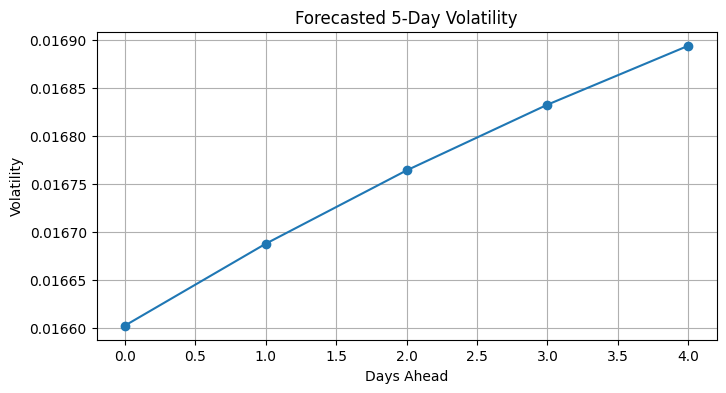

In [86]:
plt.figure(figsize=(8,4))
plt.plot(forecasted_vol, marker='o')
plt.title('Forecasted 5-Day Volatility')
plt.xlabel('Days Ahead')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


In [87]:
# Latest estimated volatility
latest_vol = garch_result.conditional_volatility[-1]
annualized_vol = latest_vol * np.sqrt(252)
print(f"Today's Volatility: {latest_vol:.4f}")
print(f"Annualized Volatility: {annualized_vol:.4f}")

Today's Volatility: 0.0175
Annualized Volatility: 0.2778


In [ ]:
from scipy.stats import norm

v_95 = norm.ppf(0.95)
v_99 = norm.ppf(0.99)

# Latest volatility from GARCH
sigma_t = garch_result.conditional_volatility[-1]

VaR_95 = v_95 * sigma_t
VaR_99 = v_99 * sigma_t

print(f"95% VaR: {-VaR_95:.4f}")
print(f"99% VaR: {-VaR_99:.4f}")


95% VaR: -0.0288
99% VaR: -0.0407


- **95% VaR = -2.88%:** There’s a 5% chance the daily loss will exceed **2.88%**.  
- **99% VaR = -4.07%:** There’s a 1% chance the daily loss will exceed **4.07%**.  

These values indicate **moderate downside risk**, with extreme losses being relatively rare — consistent with ITC’s stable large-cap nature.

In [89]:
# Assume a 5σ shock
shock = 5 * sigma_t

# Estimate potential loss
stress_loss = -shock * 100  # in %
print(f"Stress Test (5σ event): {stress_loss:.2f}% potential loss")


Stress Test (5σ event): -8.75% potential loss


A **5σ (five standard deviation)** event indicates an extremely rare market shock.  
- **Estimated loss: -8.75%**

This means that under **extreme stress conditions**, ITC could experience a **potential one-day loss of about 8.75%** — a highly improbable but severe downside scenario.